# Laboratorio 3 Regresión Logística 
## Elements of Machine Learning 
## José Alejandro Guzmán Zamora 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic
import logisticop 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


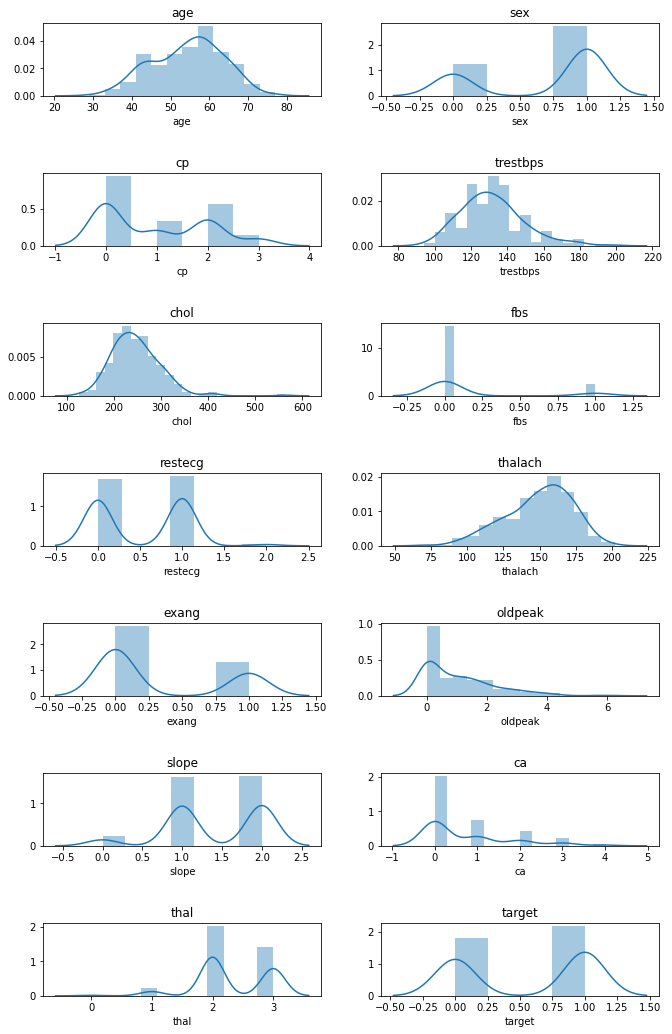

In [5]:
def distribution(data):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

distribution(data)

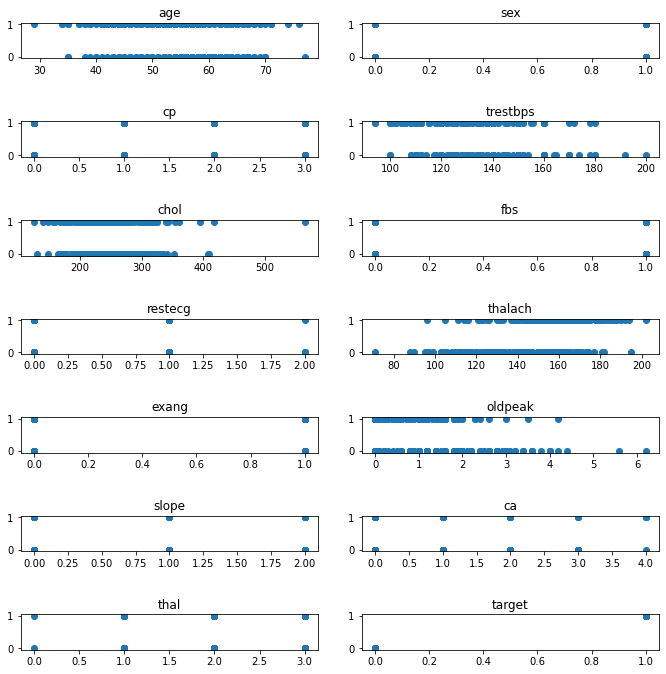

In [6]:
correlations(data, 'target')

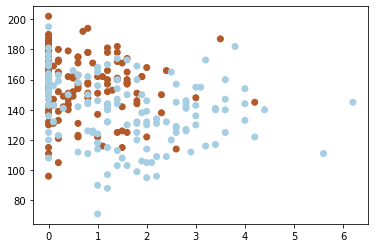

In [7]:
plt.scatter(data['oldpeak'], data['thalach'], c=data['target'], cmap=plt.cm.Paired)

In [8]:
# Probar para cada variable 

def prueba_simple(equis, ye, thetas, variable):
    thetas = np.asarray(thetas, dtype='float64').reshape(len(thetas), 1)
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    res = logisticop.optimize_log(xes, y, thetas)
    # Continuar a parametrizar la funcion 
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(res[0] + xl * res[1])))
    # Grafica de resultado
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Funcion Sigmoide con " + variable)
    plt.show()
    return res

In [9]:
# agregar la fila de unos tambien 
def costo_simple(variables, thetas):
    ones = np.expand_dims(np.asarray([1 for i in range(len(x_test[variables]))]), 1)
    siguiente = np.expand_dims(x_test[variables], 1)
    entrada = np.hstack([ones, siguiente])
    costo = logistic.cost(entrada, y_test, thetas)
    return costo  

In [10]:
data_partida = data.copy()
response = pd.DataFrame(data_partida['target'])
xes = data_partida.drop('target', 1)

x_train, x_test, y_train, y_test = train_test_split(xes, response, test_size=0.20, random_state=42)
resultados = []

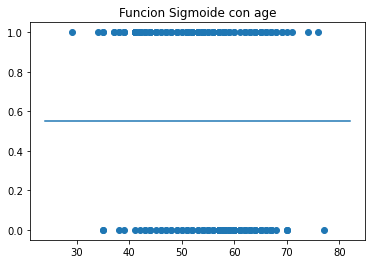

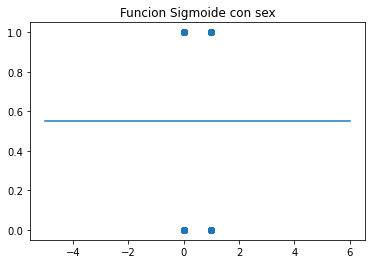

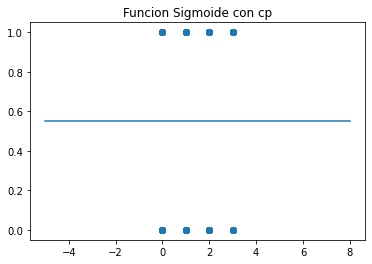

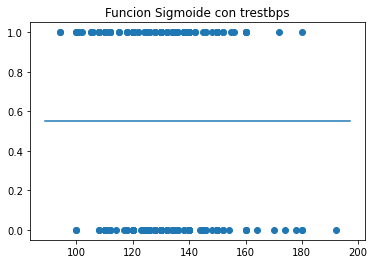

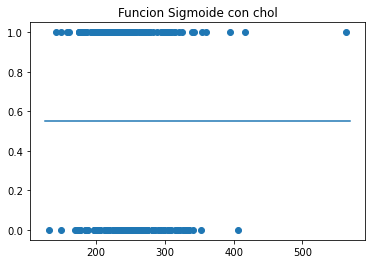

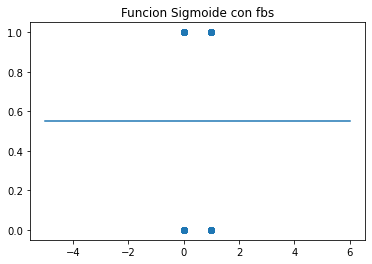

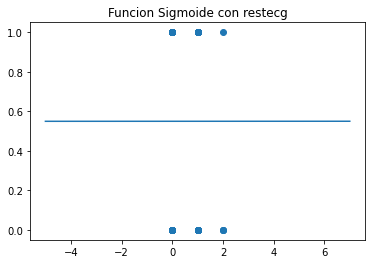

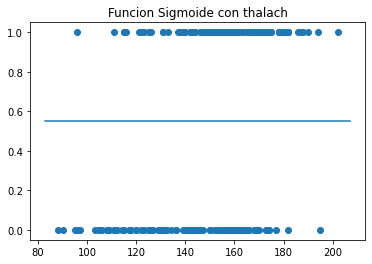

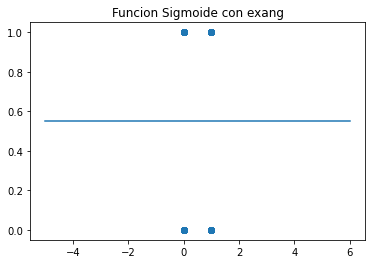

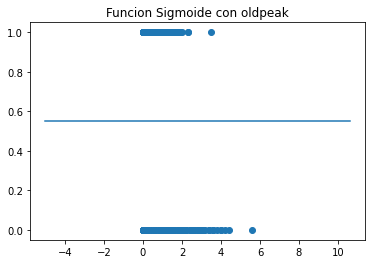

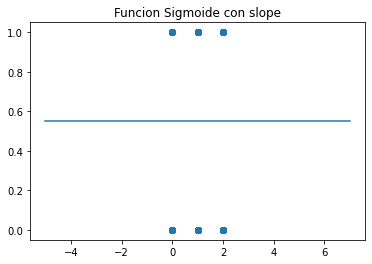

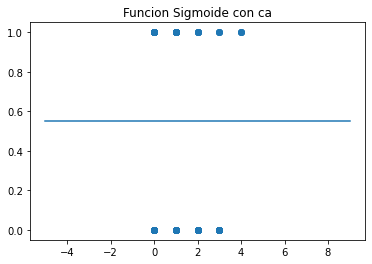

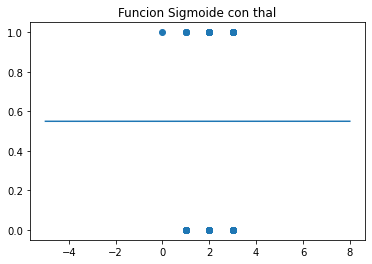

In [11]:
t = [0,0]
for i in x_test:
    res_temp = prueba_simple(x_train, y_train,t,i)
    resultados.append((costo_simple(i, res_temp)[0], res_temp, i))

In [12]:
resultados = sorted(resultados)
mejorcito = resultados[0]
print(mejorcito)

# DE AQUI YA SABEMOS QUE EN UN MODELO SIMPLE LA QUE MENOR COSTO TIENE ES RESTECG
# EN OTRAS PALABRAS el esting electrocardiographic results (values 0,1,2)

(0.6931888133418028, array([[1.98978232e-01],
       [8.23471521e-05]]), 'restecg')


In [13]:
y_test['target'].value_counts()

1    32
0    29
Name: target, dtype: int64

In [14]:
thetas_r = mejorcito[1]

In [15]:
prueba = thetas_r[0] + (thetas_r[1] * 2)
logisticamente = 1 / (1 + np.exp(-prueba))
logisticamente

array([0.54962185])

In [201]:
# ahorita nos vamos a dar cuenta que las simples son malas 
# predicciones 
import sklearn.metrics as m

def c_matrix(variable, thetast):
    unitos = np.asarray([1 for i in range(len(x_test))]).reshape(len(x_test), 1)
    if isinstance(variable, str):
        siguiente = np.expand_dims(x_test[variable],1)
    else:
        siguiente = x_test[variable]
    unidos = np.hstack([unitos,siguiente]) 
    hipotesis_prueba = logisticop.logistic(unidos, thetast)
    resultado_temp = [1 if i >= 0.5 else 0 for i in hipotesis_prueba]
    return m.confusion_matrix(y_test, resultado_temp)

In [202]:
# Evaluar el que menor costo tiene restecg 

matriz = c_matrix('restecg', resultados[0][1])
print(matriz)
print(matriz[0][0])

[[ 0 29]
 [ 0 32]]
0


In [203]:
# Out of all the positive classes, how much we predicted correctly. It should be high as possible.
def recall(mat):
    return mat[0][0] / (mat[0][0] + mat[1][0])

# Out of all the positive classes we have predicted correctly, how many are actually positive.
def precision(mat):
    return mat[0][0] / (mat[0][0] + mat[0][1])

# Out of all the classes, how much we predicted correctly. It should be high as possible.
def accuracy(mat):
    return (mat[0][0] + mat[1][1]) / sum(sum(mat))

In [204]:
print(recall(matriz))
print(precision(matriz))
print(accuracy(matriz))

# Nos podemos dar cuenta que nuestro modelo todavia esta bastante malo 

nan
0.0
0.5245901639344263


c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
def prueba_multiple(equis, ye, thetas, variables):
    thetas = np.asarray(thetas, dtype='float64').reshape(len(thetas), 1)
    #limite_inferior = min(equis[variables[0]] + equis[variables[1]])
    #limite_superior = max(equis[variables[0]] + equis[variables[1]])
    x1 = equis[variables]
    y = ye['target']
    unos = np.expand_dims(np.asarray([1 for i in range(x1.shape[0])]),1)
    xes = np.hstack([unos, x1])
    y = np.expand_dims(y,1)
    res = logisticop.optimize_log(xes, y, thetas)
    return res

In [208]:
# con todas ... 
variables_usar = [i for i in x_train]
thetas = [0 for i in range(len(variables_usar) + 1)]
algunos_intentos = prueba_multiple(x_train, y_train, thetas, variables_usar)

In [210]:
c_matrix(variables_usar, algunos_intentos)

array([[ 0, 29],
       [ 0, 32]], dtype=int64)